# EDA and Statistics before Modelling:-
    
    The aim of this notebook is to provide an insight into some EDA processes and the use of Statistics in feature selecton, specifcially the CHI-Sqaured and ANOVA tests before proceeding to two different ML Models.

## Bank Term-Deposit Conversion Prediction

Given a Dataset, wherein customer details are present as per the below data dictionary, the aim is to predict whether a Customer would invest in a term-deposit or not.

Again, the focus of this excercise is EDA and how statistics can be used in feature selection. Modelling is done at the end and HyperParameter tuning can be done to optimze the model further as the Precision and Recall values are not acceptable.Thanks to Sauveer Goel and Learnbay Team for the dataset and the direction.

References have been added at the end for implementation of CHI-Squared test, Anova test and Power Transformer (Used to reduce Skewness)

In [1]:
import pandas as pd #### used for dataframe manipulations
import numpy as np
import seaborn as sns ### plotting
import matplotlib.pyplot as plt ### plotting
import sys

%matplotlib inline

In [2]:
df_bank = pd.read_excel("bankingData.xlsx")

In [3]:
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Data Dictionary

1. age (numeric)
2. job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services")
3. marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
4. education (categorical: "unknown","secondary","primary","tertiary")
5. default: has credit in default? (binary: "yes","no")
6. balance: average yearly balance, in euros (numeric)
7. housing: has housing loan? (binary: "yes","no")
8. loan: has personal loan? (binary: "yes","no")
9. contact: contact communication type (categorical: "unknown","telephone","cellular")
10. day: last contact day of the month (numeric)1
11. month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")
12. duration: last contact duration, in seconds (numeric)
13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
15. previous: number of contacts performed before this campaign and for this client (numeric)
16. poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
17. y: has the client subscribed a term deposit? (binary: "yes","no")

### Exploratory Data Analysis

In [4]:
df_bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


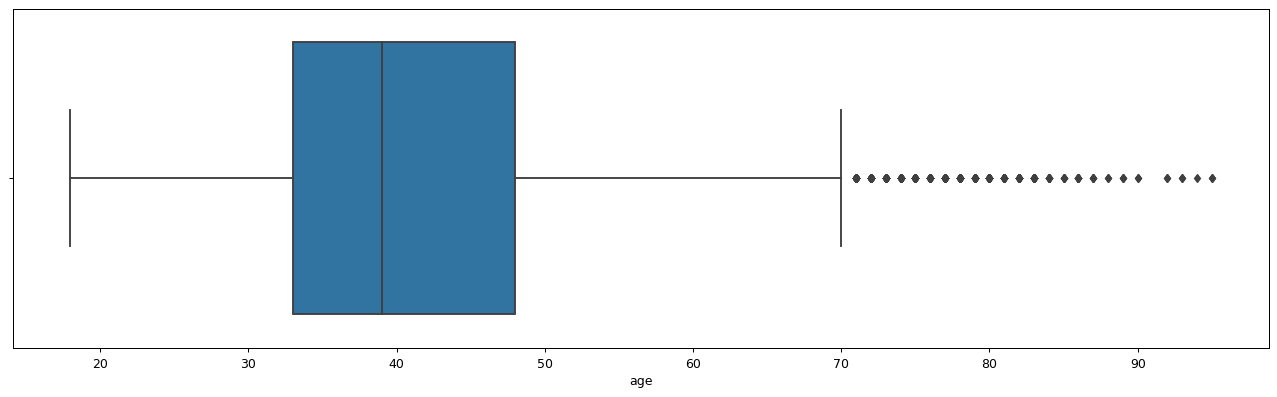

In [5]:
# Exploring the Age column, concentration of values beyond 70 is less.

plt.figure(figsize = (18,5), dpi=90)

sns.boxplot(df_bank['age'])

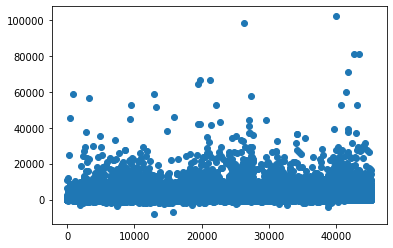

In [6]:
# For the Balance column, there seem to be outliers above 80000 and some negative values as well.

plt.scatter(df_bank.index,df_bank['balance'])

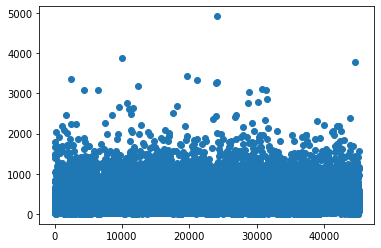

In [7]:
# For the Duration column, there seem to be outliers above 3000

plt.scatter(df_bank.index,df_bank['duration'])

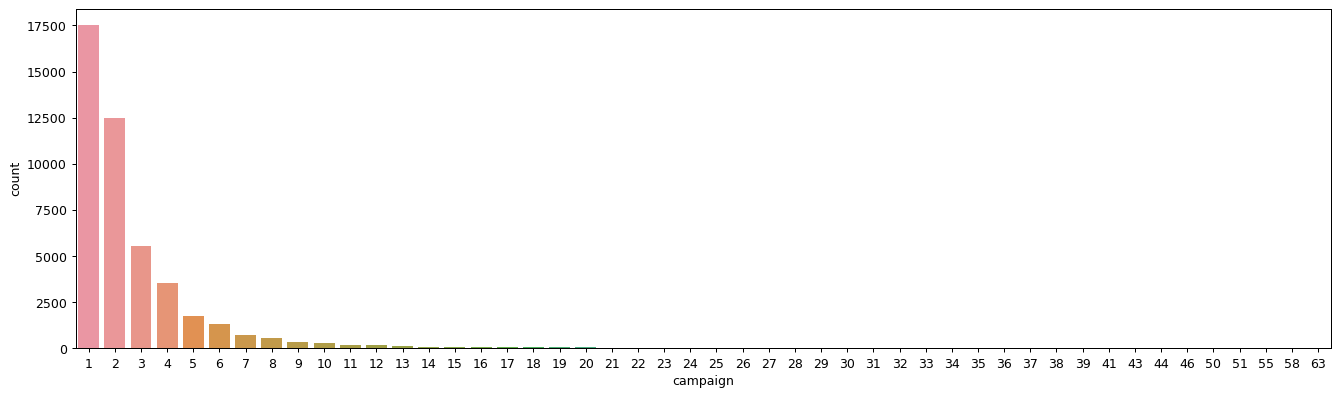

In [8]:
# The Campaign column seems to have less values beyond 5.

plt.figure(figsize = (18,5), dpi=90)

sns.countplot(x ='campaign', data = df_bank)

In [9]:
# Capping outliers from Age and Campaign. These are categorical variables and skewed, thus using IQR method to cap outliers.

# Defining an IQR-based outlier removal function

def Remove_Outlier_IQR(df, col):
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    df.loc[(df[col].values < (Q1 - 1.5*IQR), col)] = Q1 - 1.5*IQR
    df.loc[(df[col].values > (Q3 + 1.5*IQR), col)] = Q3 + 1.5*IQR
    return df

In [10]:
df_bank = Remove_Outlier_IQR(df_bank, 'age')

In [11]:
df_bank['age'].round(0).astype(int)

0        58
1        44
2        33
3        47
4        33
         ..
45206    51
45207    70
45208    70
45209    57
45210    37
Name: age, Length: 45211, dtype: int32

In [12]:
df_bank['age'] = df_bank['age'].replace([70.5],71)

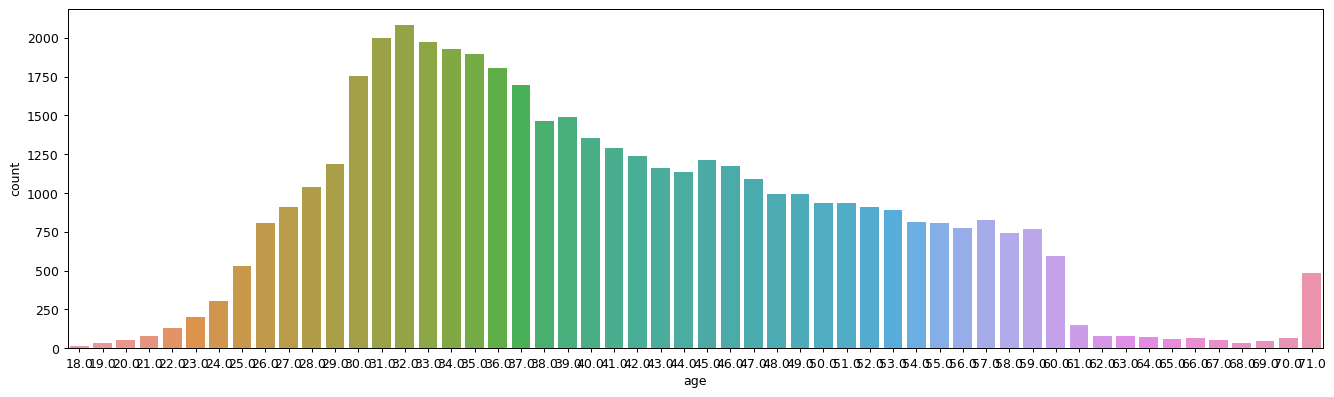

In [13]:
#After outlier capping at 71

plt.figure(figsize = (18,5), dpi=90)

sns.countplot(x ='age', data = df_bank)

In [14]:
df_bank = Remove_Outlier_IQR(df_bank, 'campaign')

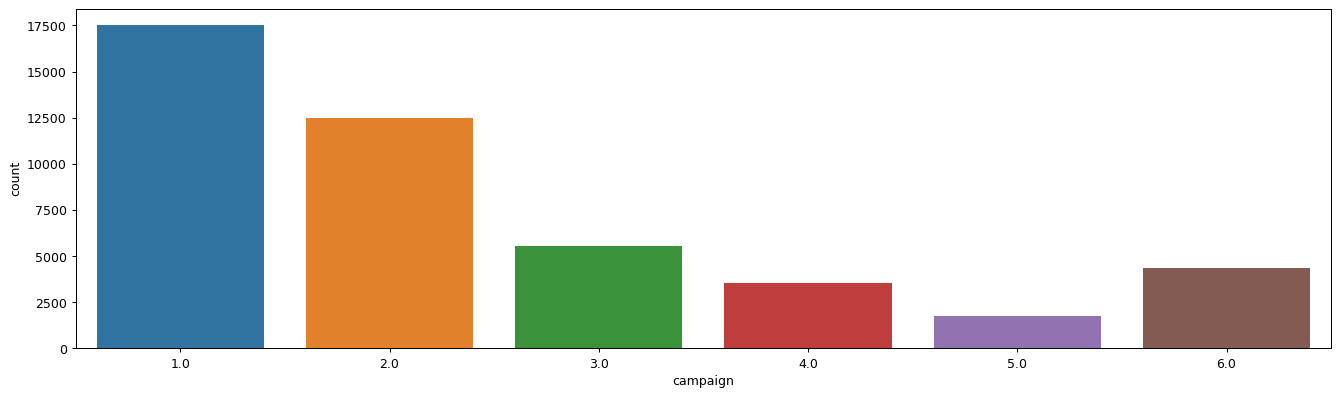

In [15]:
# After outlier capping at 6

plt.figure(figsize = (18,5), dpi=90)

sns.countplot(x ='campaign', data = df_bank)

In [16]:
df_bank['campaign'].round(0).astype('int', errors = 'raise')

0        1
1        1
2        1
3        1
4        1
        ..
45206    3
45207    2
45208    5
45209    4
45210    2
Name: campaign, Length: 45211, dtype: int32

In [17]:
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1.0,-1,0,unknown,no
1,44.0,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1.0,-1,0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1.0,-1,0,unknown,no
3,47.0,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1.0,-1,0,unknown,no
4,33.0,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1.0,-1,0,unknown,no


In [18]:
df_bank.dtypes

age          float64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign     float64
pdays          int64
previous       int64
poutcome      object
y             object
dtype: object

In [19]:
# Checking Unique_job_values and the respective % Contribution. There are 6 categories that can be combined to form a 
# significant contribution category or super grp

job_df = df_bank['job'].value_counts(normalize = True).rename_axis('unique_job_values').reset_index(name='%count')

job_df

,unique_job_values,%count
0,blue-collar,0.215257
1,management,0.209197
2,technician,0.168034
3,admin.,0.114375
4,services,0.091880
5,retired,0.050076
6,self-employed,0.034925
7,entrepreneur,0.032890
8,unemployed,0.028820
9,housemaid,0.027427


In [20]:
job_df['%count'].cumsum()

0     0.215257
1     0.424454
2     0.592489
3     0.706863
4     0.798744
5     0.848820
6     0.883745
7     0.916635
8     0.945456
9     0.972883
10    0.993630
11    1.000000
Name: %count, dtype: float64

In [21]:
# self-employed, entreprenuer, housmaid - Combining these in Other_1 grp
# unknown, unemployed, student - Combining these in Others_2 grp

df_bank.loc[(df_bank['job'] == 'self-employed', 'job')] = 'Others_1'
df_bank.loc[(df_bank['job'] == 'entreprenuer', 'job')] = 'Others_1'
df_bank.loc[(df_bank['job'] == 'housmaid', 'job')] = 'Others_1'
df_bank.loc[(df_bank['job'] == 'unknown', 'job')] = 'Others_2'
df_bank.loc[(df_bank['job'] == 'unemployed', 'job')] = 'Others_2'
df_bank.loc[(df_bank['job'] == 'student', 'job')] = 'Others_2'



In [22]:
# Checking % Contribution again

df_bank['job'].value_counts(normalize = True)

blue-collar     0.215257
management      0.209197
technician      0.168034
admin.          0.114375
services        0.091880
Others_2        0.055938
retired         0.050076
Others_1        0.034925
entrepreneur    0.032890
housemaid       0.027427
Name: job, dtype: float64

In [23]:
# Dropping this column due to very less variance

df_bank['default'].value_counts(normalize = True)

no     0.981973
yes    0.018027
Name: default, dtype: float64

In [24]:
df_bank.drop('default', inplace = True, axis = 1)

In [25]:
df_bank.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,management,married,tertiary,2143,yes,no,unknown,5,may,261,1.0,-1,0,unknown,no
1,44.0,technician,single,secondary,29,yes,no,unknown,5,may,151,1.0,-1,0,unknown,no
2,33.0,entrepreneur,married,secondary,2,yes,yes,unknown,5,may,76,1.0,-1,0,unknown,no
3,47.0,blue-collar,married,unknown,1506,yes,no,unknown,5,may,92,1.0,-1,0,unknown,no
4,33.0,Others_2,single,unknown,1,no,no,unknown,5,may,198,1.0,-1,0,unknown,no


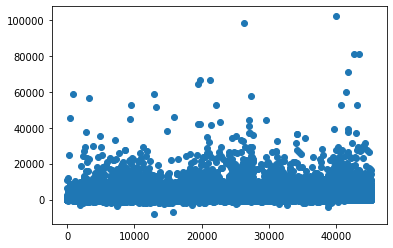

In [26]:
# Capping outliers for balance and duration columns using Z-Score as these are numerical vairbales.

plt.scatter(df_bank.index,df_bank['balance'])

In [27]:
df_bank['balance'].value_counts(normalize = True)

0        0.077724
1        0.004313
2        0.003450
4        0.003074
3        0.002964
           ...   
4305     0.000022
6352     0.000022
18881    0.000022
14889    0.000022
7218     0.000022
Name: balance, Length: 7168, dtype: float64

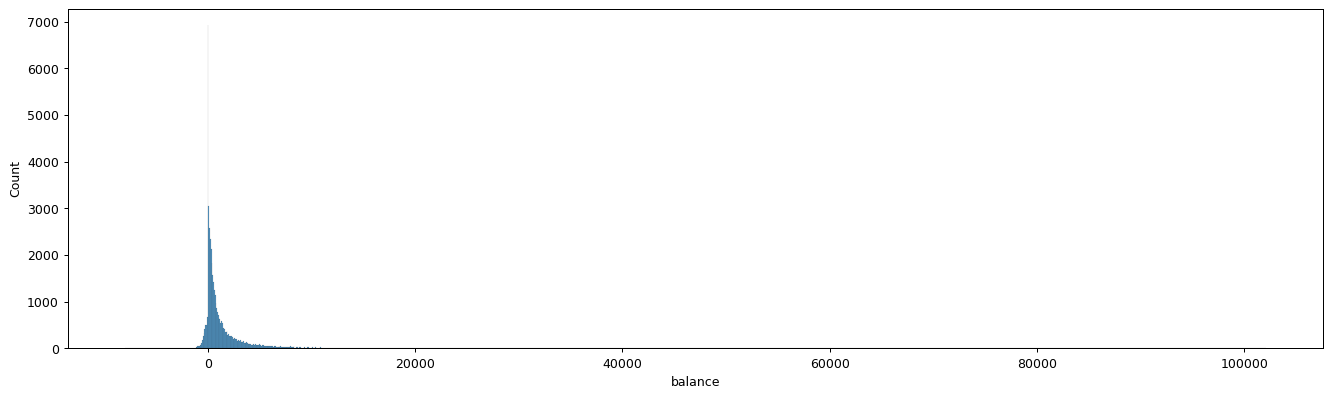

In [28]:
plt.figure(figsize = (18,5), dpi=90)

sns.histplot(df_bank.loc[df_bank.index, 'balance'])

In [29]:
df_bank.loc[(df_bank['balance'] < -666, 'balance')].count()

406

In [30]:
df_bank['balance'].quantile(0.1)

0.0

In [31]:
from scipy import stats

df_bank['Z_Score_Balance']=stats.zscore(df_bank['balance'])

In [32]:
df_bank['Z_Score_Balance'].head()

0    0.256419
1   -0.437895
2   -0.446762
3    0.047205
4   -0.447091
Name: Z_Score_Balance, dtype: float64

In [33]:
df_bank[['balance','Z_Score_Balance']].head()

,balance,Z_Score_Balance
0,2143,0.256419
1,29,-0.437895
2,2,-0.446762
3,1506,0.047205
4,1,-0.447091


In [34]:
rslt_df = df_bank[['balance','Z_Score_Balance']].sort_values(by = 'Z_Score_Balance')
rslt_df

,balance,Z_Score_Balance
12909,-8019,-3.081149
15682,-6847,-2.696221
38736,-4057,-1.779885
7413,-3372,-1.554906
1896,-3313,-1.535528
...,...,...
41693,71188,22.933291
42558,81204,26.222907
43393,81204,26.222907
26227,98417,31.876278


In [35]:
# 10500 - 3.0 Z_Score
# -1701 -1.0 Z_Score

#Finding row at which Z-Score is 3.0

s = df_bank['Z_Score_Balance']
print(s.sub(3.0).abs().idxmin())

21502


In [36]:
df_bank['balance'].iloc[21502]

10500

In [37]:
df_bank.loc[df_bank['balance'] < -1701, 'balance'] = -1701
df_bank.loc[df_bank['balance'] > 10500, 'balance'] = 10500

In [38]:
df_bank['balance'].describe

<bound method NDFrame.describe of 0        2143
1          29
2           2
3        1506
4           1
         ... 
45206     825
45207    1729
45208    5715
45209     668
45210    2971
Name: balance, Length: 45211, dtype: int64>

In [39]:
df_bank.drop('Z_Score_Balance', inplace = True, axis = 1)
df_bank.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58.0,management,married,tertiary,2143,yes,no,unknown,5,may,261,1.0,-1,0,unknown,no
1,44.0,technician,single,secondary,29,yes,no,unknown,5,may,151,1.0,-1,0,unknown,no
2,33.0,entrepreneur,married,secondary,2,yes,yes,unknown,5,may,76,1.0,-1,0,unknown,no
3,47.0,blue-collar,married,unknown,1506,yes,no,unknown,5,may,92,1.0,-1,0,unknown,no
4,33.0,Others_2,single,unknown,1,no,no,unknown,5,may,198,1.0,-1,0,unknown,no


In [40]:
# Dropping this column due to low variance

df_bank['loan'].value_counts(normalize = True)

no     0.839774
yes    0.160226
Name: loan, dtype: float64

In [41]:
# Dropping this column due to low variance

df_bank['poutcome'].value_counts(normalize = True)

unknown    0.817478
failure    0.108403
other      0.040698
success    0.033421
Name: poutcome, dtype: float64

In [42]:
df_bank.drop('loan', inplace = True, axis = 1)
df_bank.drop('poutcome', inplace = True, axis = 1)

In [43]:
df_bank['duration'].value_counts(normalize = True)

124     0.004158
90      0.004070
89      0.003915
122     0.003871
104     0.003871
          ...   
2150    0.000022
1970    0.000022
1906    0.000022
1842    0.000022
2015    0.000022
Name: duration, Length: 1573, dtype: float64

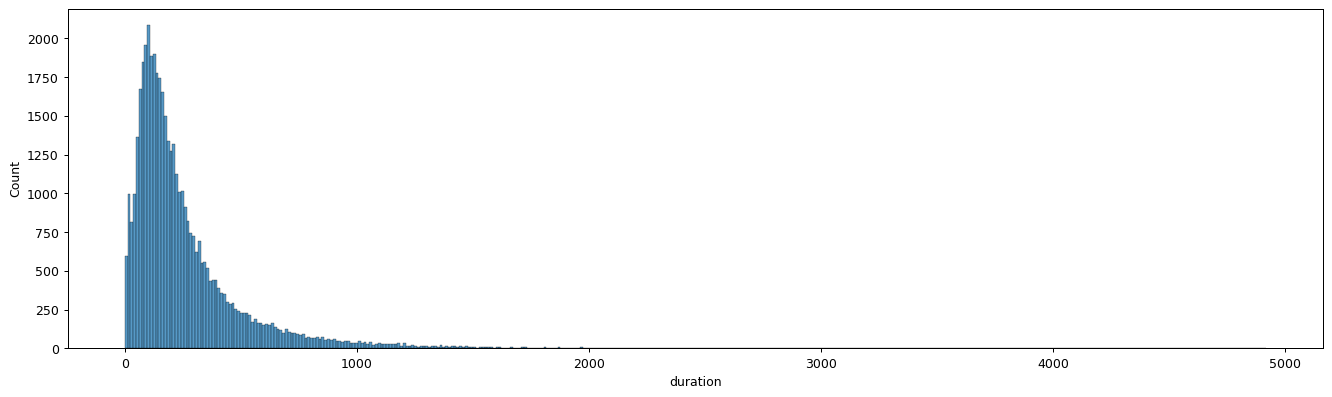

In [44]:
plt.figure(figsize = (18,5), dpi=90)

sns.histplot(df_bank.loc[df_bank.index, 'duration'])

In [45]:
df_bank['Z_Score_Duration']=stats.zscore(df_bank['duration'])
df_bank.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,y,Z_Score_Duration
0,58.0,management,married,tertiary,2143,yes,unknown,5,may,261,1.0,-1,0,no,0.011016
1,44.0,technician,single,secondary,29,yes,unknown,5,may,151,1.0,-1,0,no,-0.416127
2,33.0,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1.0,-1,0,no,-0.707361
3,47.0,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1.0,-1,0,no,-0.645231
4,33.0,Others_2,single,unknown,1,no,unknown,5,may,198,1.0,-1,0,no,-0.233620


In [46]:
print(df_bank.loc[df_bank['Z_Score_Duration'] < -0.95, 'Z_Score_Duration'].count())
print(df_bank.loc[df_bank['Z_Score_Duration'] > 3, 'Z_Score_Duration'].count())

683
963


In [47]:
rslt_df = df_bank[['duration','Z_Score_Duration']].sort_values(by = 'Z_Score_Duration')
rslt_df

,duration,Z_Score_Duration
22937,0,-1.002478
6424,0,-1.002478
36425,0,-1.002478
31740,1,-0.998595
44758,1,-0.998595
...,...,...
2386,3366,12.068100
19639,3422,12.285554
44602,3785,13.695126
9947,3881,14.067906


In [48]:
df_bank['duration'].quantile(0)

0.0

In [49]:
df_bank.loc[df_bank['duration'] > 1031, 'duration'] = 1031 # Z-Score is 3.0 at value of 1031 from Balance Column. Chcked this with displaying all rows of the Z_Score Balance dataframe above

In [50]:
df_bank.drop('Z_Score_Duration', inplace = True, axis = 1)

In [51]:
df_bank.tail()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,y
45206,51.0,technician,married,tertiary,825,no,cellular,17,nov,977,3.0,-1,0,yes
45207,71.0,retired,divorced,primary,1729,no,cellular,17,nov,456,2.0,-1,0,yes
45208,71.0,retired,married,secondary,5715,no,cellular,17,nov,1031,5.0,184,3,yes
45209,57.0,blue-collar,married,secondary,668,no,telephone,17,nov,508,4.0,-1,0,no
45210,37.0,entrepreneur,married,secondary,2971,no,cellular,17,nov,361,2.0,188,11,no


In [52]:
# 81% values are 0. Thus this columns can be dropped due to low variance

df_bank['previous'].value_counts(normalize = True)

0      0.817367
1      0.061313
2      0.046582
3      0.025259
4      0.015793
5      0.010152
6      0.006127
7      0.004534
8      0.002853
9      0.002035
10     0.001482
11     0.001438
12     0.000973
13     0.000841
15     0.000442
14     0.000420
17     0.000332
16     0.000288
19     0.000243
23     0.000177
20     0.000177
22     0.000133
18     0.000133
24     0.000111
27     0.000111
29     0.000088
25     0.000088
21     0.000088
30     0.000066
28     0.000044
26     0.000044
37     0.000044
38     0.000044
55     0.000022
40     0.000022
35     0.000022
58     0.000022
51     0.000022
41     0.000022
32     0.000022
275    0.000022
Name: previous, dtype: float64

In [53]:
# Again 81% of the values are -1. This column can be dropped due to low variance.

df_bank['pdays'].value_counts(normalize = True)

-1      0.817367
 182    0.003694
 92     0.003251
 183    0.002787
 91     0.002787
          ...   
 749    0.000022
 717    0.000022
 589    0.000022
 493    0.000022
 32     0.000022
Name: pdays, Length: 559, dtype: float64

In [54]:
df_bank.drop('previous', inplace = True, axis = 1)
df_bank.drop('pdays', inplace = True, axis = 1)

In [55]:
df_bank.describe()

,age,balance,day,duration,campaign
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.873571,1239.861118,15.806419,250.777886,2.392228
std,10.410365,2084.419395,8.322476,221.005430,1.600111
min,18.000000,-1701.000000,1.000000,0.000000,1.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000
max,71.000000,10500.000000,31.000000,1031.000000,6.000000


### Transformation of Final Data post EDA

In [56]:
df_bank['age'].describe()

count    45211.000000
mean        40.873571
std         10.410365
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         71.000000
Name: age, dtype: float64

In [57]:
df_bank.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,y
0,58.0,management,married,tertiary,2143,yes,unknown,5,may,261,1.0,no
1,44.0,technician,single,secondary,29,yes,unknown,5,may,151,1.0,no
2,33.0,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1.0,no
3,47.0,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1.0,no
4,33.0,Others_2,single,unknown,1,no,unknown,5,may,198,1.0,no


In [58]:
# Dividing the age column into equal quitiles

df_bank['age_qcuts_5'] = pd.qcut(df_bank['age'], q=5)
df_bank['age_qcuts_5'].describe()

count              45211
unique                 5
top       (17.999, 32.0]
freq               11111
Name: age_qcuts_5, dtype: object

In [59]:
df_bank['age_qcuts_5_corrected'] = df_bank['age_qcuts_5'].astype(str).str.replace("(","")

In [60]:
df_bank['age_qcuts_5_corrected'] = df_bank['age_qcuts_5_corrected'].astype(str).str.replace("]","")

In [61]:
df_bank['age_qcuts_5_corrected_2'] = df_bank['age_qcuts_5_corrected'].astype(str).str.replace("(","")

In [62]:
df_bank['age_qcuts_5_corrected_2']

0        51.0, 71.0
1        42.0, 51.0
2        32.0, 36.0
3        42.0, 51.0
4        32.0, 36.0
            ...    
45206    42.0, 51.0
45207    51.0, 71.0
45208    51.0, 71.0
45209    51.0, 71.0
45210    36.0, 42.0
Name: age_qcuts_5_corrected_2, Length: 45211, dtype: object

In [63]:
df_bank.drop('age_qcuts_5', inplace = True, axis = 1)
df_bank.drop('age_qcuts_5_corrected', inplace = True, axis = 1)

In [64]:
df_bank.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,y,age_qcuts_5_corrected_2
0,58.0,management,married,tertiary,2143,yes,unknown,5,may,261,1.0,no,"51.0, 71.0"
1,44.0,technician,single,secondary,29,yes,unknown,5,may,151,1.0,no,"42.0, 51.0"
2,33.0,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1.0,no,"32.0, 36.0"
3,47.0,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1.0,no,"42.0, 51.0"
4,33.0,Others_2,single,unknown,1,no,unknown,5,may,198,1.0,no,"32.0, 36.0"


In [65]:
df_bank.rename(columns = {'age_qcuts_5_corrected_2':'age_qcuts_5'}, inplace = True)

In [66]:
df_bank.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,y,age_qcuts_5
0,58.0,management,married,tertiary,2143,yes,unknown,5,may,261,1.0,no,"51.0, 71.0"
1,44.0,technician,single,secondary,29,yes,unknown,5,may,151,1.0,no,"42.0, 51.0"
2,33.0,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1.0,no,"32.0, 36.0"
3,47.0,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1.0,no,"42.0, 51.0"
4,33.0,Others_2,single,unknown,1,no,unknown,5,may,198,1.0,no,"32.0, 36.0"


In [67]:
df_bank['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [68]:
# Adding a Quarter column derived from Month

Q1 = ['apr','may','jun']
Q2 = ['jul','aug','sep']
Q3 = ['oct','nov','dec']
Q4 = ['jan','feb','mar']

def condition(x):
    if x in Q1:
        return 'Q1'
    elif x in Q2:
        return 'Q2'
    elif x in Q3:
        return 'Q3'
    else:
        return 'Q4'

df_bank['Month_Quarters'] = df_bank['month'].apply(condition)
df_bank.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,y,age_qcuts_5,Month_Quarters
0,58.0,management,married,tertiary,2143,yes,unknown,5,may,261,1.0,no,"51.0, 71.0",Q1
1,44.0,technician,single,secondary,29,yes,unknown,5,may,151,1.0,no,"42.0, 51.0",Q1
2,33.0,entrepreneur,married,secondary,2,yes,unknown,5,may,76,1.0,no,"32.0, 36.0",Q1
3,47.0,blue-collar,married,unknown,1506,yes,unknown,5,may,92,1.0,no,"42.0, 51.0",Q1
4,33.0,Others_2,single,unknown,1,no,unknown,5,may,198,1.0,no,"32.0, 36.0",Q1


In [69]:
df_bank.drop('month', inplace = True, axis = 1)

In [70]:
df_bank.head()

,age,job,marital,education,balance,housing,contact,day,duration,campaign,y,age_qcuts_5,Month_Quarters
0,58.0,management,married,tertiary,2143,yes,unknown,5,261,1.0,no,"51.0, 71.0",Q1
1,44.0,technician,single,secondary,29,yes,unknown,5,151,1.0,no,"42.0, 51.0",Q1
2,33.0,entrepreneur,married,secondary,2,yes,unknown,5,76,1.0,no,"32.0, 36.0",Q1
3,47.0,blue-collar,married,unknown,1506,yes,unknown,5,92,1.0,no,"42.0, 51.0",Q1
4,33.0,Others_2,single,unknown,1,no,unknown,5,198,1.0,no,"32.0, 36.0",Q1


In [71]:
df_bank['day'].value_counts()

20    2752
18    2308
21    2026
17    1939
6     1932
5     1910
14    1848
8     1842
28    1830
7     1817
19    1757
29    1745
15    1703
12    1603
13    1585
30    1566
9     1561
11    1479
4     1445
16    1415
2     1293
27    1121
3     1079
26    1035
23     939
22     905
25     840
31     643
10     524
24     447
1      322
Name: day, dtype: int64

In [72]:
# Deriving a Week Number per Month column from Day

def condition_2(x):
    if x in range(1,8):
        return 1
    elif x in range(8,15):
        return 2
    elif x in range(15,22):
        return 3
    else:
        return 4
    
df_bank['Monthly_Week'] = df_bank['day'].apply(condition_2)
df_bank.head()

,age,job,marital,education,balance,housing,contact,day,duration,campaign,y,age_qcuts_5,Month_Quarters,Monthly_Week
0,58.0,management,married,tertiary,2143,yes,unknown,5,261,1.0,no,"51.0, 71.0",Q1,1
1,44.0,technician,single,secondary,29,yes,unknown,5,151,1.0,no,"42.0, 51.0",Q1,1
2,33.0,entrepreneur,married,secondary,2,yes,unknown,5,76,1.0,no,"32.0, 36.0",Q1,1
3,47.0,blue-collar,married,unknown,1506,yes,unknown,5,92,1.0,no,"42.0, 51.0",Q1,1
4,33.0,Others_2,single,unknown,1,no,unknown,5,198,1.0,no,"32.0, 36.0",Q1,1


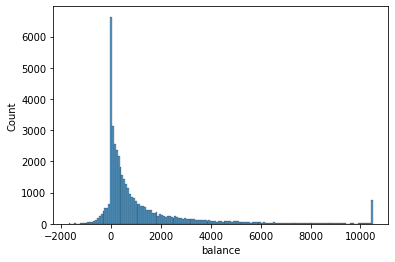

In [73]:
sns.histplot(df_bank.loc[df_bank.index, 'balance'])

In [74]:
df_bank['balance'].value_counts(normalize = True)

0        0.077724
10500    0.016456
1        0.004313
2        0.003450
4        0.003074
           ...   
5678     0.000022
7695     0.000022
5614     0.000022
7631     0.000022
7135     0.000022
Name: balance, Length: 6532, dtype: float64

In [75]:
# Dividing Balance column into quintiles

df_bank['balance_qcuts_5'] = pd.qcut(df_bank['balance'], q=5)
df_bank['balance_qcuts_5'].value_counts(normalize = True)

(22.0, 272.0]        0.200394
(-1701.001, 22.0]    0.200239
(1859.0, 10500.0]    0.199996
(701.0, 1859.0]      0.199929
(272.0, 701.0]       0.199443
Name: balance_qcuts_5, dtype: float64

In [76]:
df_bank.head()

,age,job,marital,education,balance,housing,contact,day,duration,campaign,y,age_qcuts_5,Month_Quarters,Monthly_Week,balance_qcuts_5
0,58.0,management,married,tertiary,2143,yes,unknown,5,261,1.0,no,"51.0, 71.0",Q1,1,"(1859.0, 10500.0]"
1,44.0,technician,single,secondary,29,yes,unknown,5,151,1.0,no,"42.0, 51.0",Q1,1,"(22.0, 272.0]"
2,33.0,entrepreneur,married,secondary,2,yes,unknown,5,76,1.0,no,"32.0, 36.0",Q1,1,"(-1701.001, 22.0]"
3,47.0,blue-collar,married,unknown,1506,yes,unknown,5,92,1.0,no,"42.0, 51.0",Q1,1,"(701.0, 1859.0]"
4,33.0,Others_2,single,unknown,1,no,unknown,5,198,1.0,no,"32.0, 36.0",Q1,1,"(-1701.001, 22.0]"


In [77]:
df_bank['balance_qcuts_5_corrected'] = df_bank['balance_qcuts_5'].astype(str).str.replace("(","")
df_bank['balance_qcuts_5_corrected_2'] = df_bank['balance_qcuts_5_corrected'].astype(str).str.replace("]","")

In [78]:
df_bank.drop('balance_qcuts_5', inplace = True, axis = 1)
df_bank.drop('balance_qcuts_5_corrected', inplace = True, axis = 1)

In [79]:
df_bank.rename(columns = {'balance_qcuts_5_corrected_2':'balance_qcuts_5'}, inplace = True)

In [80]:
df_bank.head()

,age,job,marital,education,balance,housing,contact,day,duration,campaign,y,age_qcuts_5,Month_Quarters,Monthly_Week,balance_qcuts_5
0,58.0,management,married,tertiary,2143,yes,unknown,5,261,1.0,no,"51.0, 71.0",Q1,1,"1859.0, 10500.0"
1,44.0,technician,single,secondary,29,yes,unknown,5,151,1.0,no,"42.0, 51.0",Q1,1,"22.0, 272.0"
2,33.0,entrepreneur,married,secondary,2,yes,unknown,5,76,1.0,no,"32.0, 36.0",Q1,1,"-1701.001, 22.0"
3,47.0,blue-collar,married,unknown,1506,yes,unknown,5,92,1.0,no,"42.0, 51.0",Q1,1,"701.0, 1859.0"
4,33.0,Others_2,single,unknown,1,no,unknown,5,198,1.0,no,"32.0, 36.0",Q1,1,"-1701.001, 22.0"


In [81]:
# Dividing duration into 5 quintiles

df_bank['duration_qcuts_5'] = pd.qcut(df_bank['duration'], q=5)
df_bank['duration_qcuts_5'].value_counts(normalize = True)

(-0.001, 89.0]     0.201389
(89.0, 147.0]      0.200372
(368.0, 1031.0]    0.199841
(147.0, 223.0]     0.199664
(223.0, 368.0]     0.198735
Name: duration_qcuts_5, dtype: float64

In [82]:
df_bank['duration_qcuts_5_corrected'] = df_bank['duration_qcuts_5'].astype(str).str.replace("(","")
df_bank['duration_qcuts_5_corrected_2'] = df_bank['duration_qcuts_5_corrected'].astype(str).str.replace("]","")

In [83]:
df_bank.drop('duration_qcuts_5', inplace = True, axis = 1)
df_bank.drop('duration_qcuts_5_corrected', inplace = True, axis = 1)

In [84]:
df_bank.rename(columns = {'duration_qcuts_5_corrected_2':'duration_qcuts_5'}, inplace = True)

In [85]:
df_bank.head()

,age,job,marital,education,balance,housing,contact,day,duration,campaign,y,age_qcuts_5,Month_Quarters,Monthly_Week,balance_qcuts_5,duration_qcuts_5
0,58.0,management,married,tertiary,2143,yes,unknown,5,261,1.0,no,"51.0, 71.0",Q1,1,"1859.0, 10500.0","223.0, 368.0"
1,44.0,technician,single,secondary,29,yes,unknown,5,151,1.0,no,"42.0, 51.0",Q1,1,"22.0, 272.0","147.0, 223.0"
2,33.0,entrepreneur,married,secondary,2,yes,unknown,5,76,1.0,no,"32.0, 36.0",Q1,1,"-1701.001, 22.0","-0.001, 89.0"
3,47.0,blue-collar,married,unknown,1506,yes,unknown,5,92,1.0,no,"42.0, 51.0",Q1,1,"701.0, 1859.0","89.0, 147.0"
4,33.0,Others_2,single,unknown,1,no,unknown,5,198,1.0,no,"32.0, 36.0",Q1,1,"-1701.001, 22.0","147.0, 223.0"


In [86]:
df_bank.dtypes

age                 float64
job                  object
marital              object
education            object
balance               int64
housing              object
contact              object
day                   int64
duration              int64
campaign            float64
y                    object
age_qcuts_5          object
Month_Quarters       object
Monthly_Week          int64
balance_qcuts_5      object
duration_qcuts_5     object
dtype: object

In [87]:
df_bank['duration'] = df_bank['duration'].astype(float, errors = 'raise')

In [88]:
#ILAT Transformations of Duration and Balance columns

df_bank['inverse_duration'] = df_bank['duration'].apply(lambda x: 1/x if x != 0 else 0)
df_bank['inverse_balance'] = df_bank['balance'].apply(lambda x: 1/x if x != 0 else 0)

In [89]:
df_bank.head()

,age,job,marital,education,balance,housing,contact,day,duration,campaign,y,age_qcuts_5,Month_Quarters,Monthly_Week,balance_qcuts_5,duration_qcuts_5,inverse_duration,inverse_balance
0,58.0,management,married,tertiary,2143,yes,unknown,5,261.0,1.0,no,"51.0, 71.0",Q1,1,"1859.0, 10500.0","223.0, 368.0",0.003831,0.000467
1,44.0,technician,single,secondary,29,yes,unknown,5,151.0,1.0,no,"42.0, 51.0",Q1,1,"22.0, 272.0","147.0, 223.0",0.006623,0.034483
2,33.0,entrepreneur,married,secondary,2,yes,unknown,5,76.0,1.0,no,"32.0, 36.0",Q1,1,"-1701.001, 22.0","-0.001, 89.0",0.013158,0.500000
3,47.0,blue-collar,married,unknown,1506,yes,unknown,5,92.0,1.0,no,"42.0, 51.0",Q1,1,"701.0, 1859.0","89.0, 147.0",0.010870,0.000664
4,33.0,Others_2,single,unknown,1,no,unknown,5,198.0,1.0,no,"32.0, 36.0",Q1,1,"-1701.001, 22.0","147.0, 223.0",0.005051,1.000000


In [90]:
import math

def log_func(x):
    if x > 0:
        return math.log(x)
    elif x < 0:
        return 0
    else:
        return 0

df_bank['log_duration'] = df_bank['duration'].apply(log_func)
df_bank['log_balance'] = df_bank['balance'].apply(log_func)

In [91]:
df_bank.head()

,age,job,marital,education,balance,housing,contact,day,duration,campaign,y,age_qcuts_5,Month_Quarters,Monthly_Week,balance_qcuts_5,duration_qcuts_5,inverse_duration,inverse_balance,log_duration,log_balance
0,58.0,management,married,tertiary,2143,yes,unknown,5,261.0,1.0,no,"51.0, 71.0",Q1,1,"1859.0, 10500.0","223.0, 368.0",0.003831,0.000467,5.564520,7.669962
1,44.0,technician,single,secondary,29,yes,unknown,5,151.0,1.0,no,"42.0, 51.0",Q1,1,"22.0, 272.0","147.0, 223.0",0.006623,0.034483,5.017280,3.367296
2,33.0,entrepreneur,married,secondary,2,yes,unknown,5,76.0,1.0,no,"32.0, 36.0",Q1,1,"-1701.001, 22.0","-0.001, 89.0",0.013158,0.500000,4.330733,0.693147
3,47.0,blue-collar,married,unknown,1506,yes,unknown,5,92.0,1.0,no,"42.0, 51.0",Q1,1,"701.0, 1859.0","89.0, 147.0",0.010870,0.000664,4.521789,7.317212
4,33.0,Others_2,single,unknown,1,no,unknown,5,198.0,1.0,no,"32.0, 36.0",Q1,1,"-1701.001, 22.0","147.0, 223.0",0.005051,1.000000,5.288267,0.000000


In [92]:
df_bank['square_duration'] = df_bank['duration'].apply(lambda x: x*x)
df_bank['square_balance'] = df_bank['balance'].apply(lambda x: x*x)
df_bank['cube_duration'] = df_bank['duration'].apply(lambda x: x*x*x)
df_bank['cube_balance'] = df_bank['balance'].apply(lambda x: x*x*x)
df_bank['sq_root_duration'] = df_bank['duration'].apply(lambda x: math.sqrt(x) if x > 0 else 0)
df_bank['sq_root_balance'] = df_bank['balance'].apply(lambda x: math.sqrt(x) if x > 0 else 0)

In [93]:
df_bank.head()

,age,job,marital,education,balance,housing,contact,day,duration,campaign,...,inverse_duration,inverse_balance,log_duration,log_balance,square_duration,square_balance,cube_duration,cube_balance,sq_root_duration,sq_root_balance
0,58.0,management,married,tertiary,2143,yes,unknown,5,261.0,1.0,...,0.003831,0.000467,5.564520,7.669962,68121.0,4592449,17779581.0,9841618207,16.155494,46.292548
1,44.0,technician,single,secondary,29,yes,unknown,5,151.0,1.0,...,0.006623,0.034483,5.017280,3.367296,22801.0,841,3442951.0,24389,12.288206,5.385165
2,33.0,entrepreneur,married,secondary,2,yes,unknown,5,76.0,1.0,...,0.013158,0.500000,4.330733,0.693147,5776.0,4,438976.0,8,8.717798,1.414214
3,47.0,blue-collar,married,unknown,1506,yes,unknown,5,92.0,1.0,...,0.010870,0.000664,4.521789,7.317212,8464.0,2268036,778688.0,3415662216,9.591663,38.807216
4,33.0,Others_2,single,unknown,1,no,unknown,5,198.0,1.0,...,0.005051,1.000000,5.288267,0.000000,39204.0,1,7762392.0,1,14.071247,1.000000


In [94]:
df_bank['cu_root_duration'] = df_bank['duration'].apply(lambda x: pow(x,(1.0/3)) if x > 0 else 0)
df_bank['cu_root_balance'] = df_bank['balance'].apply(lambda x: pow(x,(1.0/3)) if x > 0 else 0)

In [95]:
df_bank.head()

,age,job,marital,education,balance,housing,contact,day,duration,campaign,...,log_duration,log_balance,square_duration,square_balance,cube_duration,cube_balance,sq_root_duration,sq_root_balance,cu_root_duration,cu_root_balance
0,58.0,management,married,tertiary,2143,yes,unknown,5,261.0,1.0,...,5.564520,7.669962,68121.0,4592449,17779581.0,9841618207,16.155494,46.292548,6.390677,12.892606
1,44.0,technician,single,secondary,29,yes,unknown,5,151.0,1.0,...,5.017280,3.367296,22801.0,841,3442951.0,24389,12.288206,5.385165,5.325074,3.072317
2,33.0,entrepreneur,married,secondary,2,yes,unknown,5,76.0,1.0,...,4.330733,0.693147,5776.0,4,438976.0,8,8.717798,1.414214,4.235824,1.259921
3,47.0,blue-collar,married,unknown,1506,yes,unknown,5,92.0,1.0,...,4.521789,7.317212,8464.0,2268036,778688.0,3415662216,9.591663,38.807216,4.514357,11.462385
4,33.0,Others_2,single,unknown,1,no,unknown,5,198.0,1.0,...,5.288267,0.000000,39204.0,1,7762392.0,1,14.071247,1.000000,5.828477,1.000000


In [96]:
df_bank['sine_duration'] = df_bank['duration'].apply(lambda x: math.sin(x))
df_bank['cos_duration'] = df_bank['duration'].apply(lambda x: math.cos(x))

In [97]:
df_bank.head()

,age,job,marital,education,balance,housing,contact,day,duration,campaign,...,square_duration,square_balance,cube_duration,cube_balance,sq_root_duration,sq_root_balance,cu_root_duration,cu_root_balance,sine_duration,cos_duration
0,58.0,management,married,tertiary,2143,yes,unknown,5,261.0,1.0,...,68121.0,4592449,17779581.0,9841618207,16.155494,46.292548,6.390677,12.892606,-0.245281,-0.969452
1,44.0,technician,single,secondary,29,yes,unknown,5,151.0,1.0,...,22801.0,841,3442951.0,24389,12.288206,5.385165,5.325074,3.072317,0.202150,0.979355
2,33.0,entrepreneur,married,secondary,2,yes,unknown,5,76.0,1.0,...,5776.0,4,438976.0,8,8.717798,1.414214,4.235824,1.259921,0.566108,0.824331
3,47.0,blue-collar,married,unknown,1506,yes,unknown,5,92.0,1.0,...,8464.0,2268036,778688.0,3415662216,9.591663,38.807216,4.514357,11.462385,-0.779466,-0.626444
4,33.0,Others_2,single,unknown,1,no,unknown,5,198.0,1.0,...,39204.0,1,7762392.0,1,14.071247,1.000000,5.828477,1.000000,-0.079579,-0.996829


In [98]:
df_bank['sine_balance'] = df_bank['balance'].apply(lambda x: math.sin(x))
df_bank['cos_balance'] = df_bank['balance'].apply(lambda x: math.cos(x))

In [99]:
df_bank.head()

,age,job,marital,education,balance,housing,contact,day,duration,campaign,...,cube_duration,cube_balance,sq_root_duration,sq_root_balance,cu_root_duration,cu_root_balance,sine_duration,cos_duration,sine_balance,cos_balance
0,58.0,management,married,tertiary,2143,yes,unknown,5,261.0,1.0,...,17779581.0,9841618207,16.155494,46.292548,6.390677,12.892606,-0.245281,-0.969452,0.420331,0.907371
1,44.0,technician,single,secondary,29,yes,unknown,5,151.0,1.0,...,3442951.0,24389,12.288206,5.385165,5.325074,3.072317,0.202150,0.979355,-0.663634,-0.748058
2,33.0,entrepreneur,married,secondary,2,yes,unknown,5,76.0,1.0,...,438976.0,8,8.717798,1.414214,4.235824,1.259921,0.566108,0.824331,0.909297,-0.416147
3,47.0,blue-collar,married,unknown,1506,yes,unknown,5,92.0,1.0,...,778688.0,3415662216,9.591663,38.807216,4.514357,11.462385,-0.779466,-0.626444,-0.923505,-0.383587
4,33.0,Others_2,single,unknown,1,no,unknown,5,198.0,1.0,...,7762392.0,1,14.071247,1.000000,5.828477,1.000000,-0.079579,-0.996829,0.841471,0.540302


In [100]:
df_bank.dtypes

age                 float64
job                  object
marital              object
education            object
balance               int64
housing              object
contact              object
day                   int64
duration            float64
campaign            float64
y                    object
age_qcuts_5          object
Month_Quarters       object
Monthly_Week          int64
balance_qcuts_5      object
duration_qcuts_5     object
inverse_duration    float64
inverse_balance     float64
log_duration        float64
log_balance         float64
square_duration     float64
square_balance        int64
cube_duration       float64
cube_balance          int64
sq_root_duration    float64
sq_root_balance     float64
cu_root_duration    float64
cu_root_balance     float64
sine_duration       float64
cos_duration        float64
sine_balance        float64
cos_balance         float64
dtype: object

In [101]:
# Separating out the Categorical Columns

cat_columns_1 = list(df_bank.select_dtypes(include = ['int64']).columns)

cat_columns_2 = list(df_bank.select_dtypes(include = ['object']).columns)

cat_columns = cat_columns_1 + cat_columns_2
cat_columns.append(df_bank.columns[9])

In [102]:
len(cat_columns)

16

In [103]:
unwanted = [0,1,2,3,4,10]
i = range(0,16)

index_cat = [ele for ele in i if ele not in unwanted]
index_cat

[5, 6, 7, 8, 9, 11, 12, 13, 14, 15]

In [104]:
len(cat_columns)

16

In [105]:
cat_columns = [cat_columns[j] for j in index_cat]
cat_columns

['job',
 'marital',
 'education',
 'housing',
 'contact',
 'age_qcuts_5',
 'Month_Quarters',
 'balance_qcuts_5',
 'duration_qcuts_5',
 'campaign']

In [106]:
cat_columns_df = df_bank[cat_columns].copy()
cat_columns_df.head()

,job,marital,education,housing,contact,age_qcuts_5,Month_Quarters,balance_qcuts_5,duration_qcuts_5,campaign
0,management,married,tertiary,yes,unknown,"51.0, 71.0",Q1,"1859.0, 10500.0","223.0, 368.0",1.0
1,technician,single,secondary,yes,unknown,"42.0, 51.0",Q1,"22.0, 272.0","147.0, 223.0",1.0
2,entrepreneur,married,secondary,yes,unknown,"32.0, 36.0",Q1,"-1701.001, 22.0","-0.001, 89.0",1.0
3,blue-collar,married,unknown,yes,unknown,"42.0, 51.0",Q1,"701.0, 1859.0","89.0, 147.0",1.0
4,Others_2,single,unknown,no,unknown,"32.0, 36.0",Q1,"-1701.001, 22.0","147.0, 223.0",1.0


In [107]:
cat_columns_df.columns

Index(['job', 'marital', 'education', 'housing', 'contact', 'age_qcuts_5',
       'Month_Quarters', 'balance_qcuts_5', 'duration_qcuts_5', 'campaign'],
      dtype='object')

In [108]:
#Label encoding for Ordinal Columns and One-Hot Encoding for Nominal Columns

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

cat_columns_df['education'] = label_encoder.fit_transform(cat_columns_df['education'])
cat_columns_df['Month_Quarters'] = label_encoder.fit_transform(cat_columns_df['Month_Quarters'])
cat_columns_df['age_qcuts_5'] = label_encoder.fit_transform(cat_columns_df['age_qcuts_5'])
cat_columns_df['balance_qcuts_5'] = label_encoder.fit_transform(cat_columns_df['balance_qcuts_5'])
cat_columns_df['duration_qcuts_5'] = label_encoder.fit_transform(cat_columns_df['duration_qcuts_5'])
cat_columns_df['job'] = label_encoder.fit_transform(cat_columns_df['job'])

l = pd.get_dummies(cat_columns_df['marital'],prefix = 'MA')

cat_columns_df.drop(['marital'],axis=1,inplace=True)

cat_columns_df = pd.concat([cat_columns_df,l],axis=1)

m = pd.get_dummies(cat_columns_df['contact'],prefix = 'CO')

cat_columns_df.drop(['contact'],axis=1,inplace=True)

cat_columns_df = pd.concat([cat_columns_df,m],axis=1)

n = pd.get_dummies(cat_columns_df['housing'],prefix = 'HO')

cat_columns_df.drop(['housing'],axis=1,inplace=True)

cat_columns_df = pd.concat([cat_columns_df,n],axis=1)

o = pd.get_dummies(cat_columns_df['campaign'],prefix = 'CA')

cat_columns_df.drop(['campaign'],axis=1,inplace=True)

cat_columns_df = pd.concat([cat_columns_df,o],axis=1)

cat_columns_df.head()

,job,education,age_qcuts_5,Month_Quarters,balance_qcuts_5,duration_qcuts_5,MA_divorced,MA_married,MA_single,CO_cellular,CO_telephone,CO_unknown,HO_no,HO_yes,CA_1.0,CA_2.0,CA_3.0,CA_4.0,CA_5.0,CA_6.0
0,6,2,4,0,1,2,0,1,0,0,0,1,0,1,1,0,0,0,0,0
1,9,1,3,0,2,1,0,0,1,0,0,1,0,1,1,0,0,0,0,0
2,4,1,1,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0
3,3,3,3,0,4,4,0,1,0,0,0,1,0,1,1,0,0,0,0,0
4,1,3,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0


### CHI and Anova Test for Categorical and Numerical Columns
- Also a check for Linear / Non-Linear Relationships

In [109]:
# Chi-Square test on Categorical columns

from sklearn.feature_selection import chi2

y = label_encoder.fit_transform(df_bank['y'])

chi_scores = chi2(cat_columns_df,y)
chi_scores

(array([7.93123663e-01, 9.06177226e+01, 4.65563803e+00, 4.98226346e+02,
        6.12571041e+01, 8.59947461e+02, 3.07471598e-01, 6.53527571e+01,
        1.30835717e+02, 2.94017126e+02, 8.34216579e+00, 7.33354934e+02,
        4.86744003e+02, 3.88949715e+02, 1.42744113e+02, 2.96571590e+00,
        1.36224542e+00, 2.48168967e+01, 2.49013767e+01, 1.46212119e+02]),
 array([3.73157267e-001, 1.74292216e-021, 3.09517275e-002, 2.31144201e-110,
        5.00875049e-015, 5.00013720e-189, 5.79235874e-001, 6.26222525e-016,
        2.68969926e-030, 6.62645540e-066, 3.87353947e-003, 1.66990708e-161,
        7.28257003e-108, 1.40128480e-086, 6.68620513e-033, 8.50468046e-002,
        2.43148709e-001, 6.30424252e-007, 6.03393204e-007, 1.16672651e-033]))

In [110]:
p_values = pd.Series(chi_scores[1],index = cat_columns_df.columns)
p_values.sort_values(ascending = False , inplace = True)

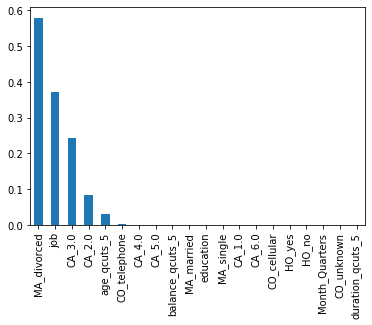

In [111]:
p_values.plot.bar()

# Y (Target) does not depend on Job column since, we fail to reject Null-Hypothesis in this case - Can drop this column

In [112]:
df_bank.drop('job', inplace = True, axis = 1)

# Have to drop Marital_Divorced, Campaign_3 and Campaign_2 as per the above test.

In [113]:
df_bank.head()

,age,marital,education,balance,housing,contact,day,duration,campaign,y,...,cube_duration,cube_balance,sq_root_duration,sq_root_balance,cu_root_duration,cu_root_balance,sine_duration,cos_duration,sine_balance,cos_balance
0,58.0,married,tertiary,2143,yes,unknown,5,261.0,1.0,no,...,17779581.0,9841618207,16.155494,46.292548,6.390677,12.892606,-0.245281,-0.969452,0.420331,0.907371
1,44.0,single,secondary,29,yes,unknown,5,151.0,1.0,no,...,3442951.0,24389,12.288206,5.385165,5.325074,3.072317,0.202150,0.979355,-0.663634,-0.748058
2,33.0,married,secondary,2,yes,unknown,5,76.0,1.0,no,...,438976.0,8,8.717798,1.414214,4.235824,1.259921,0.566108,0.824331,0.909297,-0.416147
3,47.0,married,unknown,1506,yes,unknown,5,92.0,1.0,no,...,778688.0,3415662216,9.591663,38.807216,4.514357,11.462385,-0.779466,-0.626444,-0.923505,-0.383587
4,33.0,single,unknown,1,no,unknown,5,198.0,1.0,no,...,7762392.0,1,14.071247,1.000000,5.828477,1.000000,-0.079579,-0.996829,0.841471,0.540302


In [114]:
#For Anova, there are three prerequisites that the dataset has to fulfill - lesser Skewed, less excess Kurtosis, Homogeneity in Variance
# Separating out the Numerical Columns

num_columns = list(df_bank.select_dtypes(include = ['float64']).columns)

num_columns.pop(0)
num_columns.pop(1)
num_columns

['duration',
 'inverse_duration',
 'inverse_balance',
 'log_duration',
 'log_balance',
 'square_duration',
 'cube_duration',
 'sq_root_duration',
 'sq_root_balance',
 'cu_root_duration',
 'cu_root_balance',
 'sine_duration',
 'cos_duration',
 'sine_balance',
 'cos_balance']

In [115]:
append_col = ['age','balance','day','square_balance','cube_balance']

num_columns.extend(append_col)
num_columns

['duration',
 'inverse_duration',
 'inverse_balance',
 'log_duration',
 'log_balance',
 'square_duration',
 'cube_duration',
 'sq_root_duration',
 'sq_root_balance',
 'cu_root_duration',
 'cu_root_balance',
 'sine_duration',
 'cos_duration',
 'sine_balance',
 'cos_balance',
 'age',
 'balance',
 'day',
 'square_balance',
 'cube_balance']

In [116]:
num_columns_df = df_bank[num_columns].copy()
num_columns_df.head()

,duration,inverse_duration,inverse_balance,log_duration,log_balance,square_duration,cube_duration,sq_root_duration,sq_root_balance,cu_root_duration,cu_root_balance,sine_duration,cos_duration,sine_balance,cos_balance,age,balance,day,square_balance,cube_balance
0,261.0,0.003831,0.000467,5.564520,7.669962,68121.0,17779581.0,16.155494,46.292548,6.390677,12.892606,-0.245281,-0.969452,0.420331,0.907371,58.0,2143,5,4592449,9841618207
1,151.0,0.006623,0.034483,5.017280,3.367296,22801.0,3442951.0,12.288206,5.385165,5.325074,3.072317,0.202150,0.979355,-0.663634,-0.748058,44.0,29,5,841,24389
2,76.0,0.013158,0.500000,4.330733,0.693147,5776.0,438976.0,8.717798,1.414214,4.235824,1.259921,0.566108,0.824331,0.909297,-0.416147,33.0,2,5,4,8
3,92.0,0.010870,0.000664,4.521789,7.317212,8464.0,778688.0,9.591663,38.807216,4.514357,11.462385,-0.779466,-0.626444,-0.923505,-0.383587,47.0,1506,5,2268036,3415662216
4,198.0,0.005051,1.000000,5.288267,0.000000,39204.0,7762392.0,14.071247,1.000000,5.828477,1.000000,-0.079579,-0.996829,0.841471,0.540302,33.0,1,5,1,1


In [117]:
num_columns_df.describe()

,duration,inverse_duration,inverse_balance,log_duration,log_balance,square_duration,cube_duration,sq_root_duration,sq_root_balance,cu_root_duration,cu_root_balance,sine_duration,cos_duration,sine_balance,cos_balance,age,balance,day,square_balance,cube_balance
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,4.521100e+04,4.521100e+04,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,4.521100e+04,4.521100e+04
mean,250.777886,0.009793,0.010663,5.156706,5.297758,1.117319e+05,7.157243e+07,14.532785,26.398071,5.833078,7.898309,0.011462,0.020419,0.013857,0.077591,40.873571,1239.861118,15.806419,5.881964e+06,4.201288e+10
std,221.005430,0.018495,0.085485,0.921787,2.787334,2.083328e+05,1.982079e+08,6.291019,23.851666,1.695935,5.474864,0.703668,0.710159,0.681250,0.727810,10.410365,2084.419395,8.322476,1.800815e+07,1.741847e+11
min,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-0.999990,-1.000000,-0.999993,-1.000000,18.000000,-1701.000000,1.000000,0.000000e+00,-4.921675e+09
25%,103.000000,0.003135,0.000256,4.634729,4.276666,1.060900e+04,1.092727e+06,10.148892,8.485281,4.687548,4.160168,-0.689698,-0.692896,-0.650059,-0.653644,33.000000,72.000000,8.000000,1.876900e+04,3.732480e+05
50%,180.000000,0.005556,0.001072,5.192957,6.104793,3.240000e+04,5.832000e+06,13.416408,21.166010,5.646216,7.651725,0.035398,0.039821,0.000000,0.136737,39.000000,448.000000,16.000000,2.352250e+05,8.991539e+07
75%,319.000000,0.009709,0.003460,5.765191,7.264030,1.017610e+05,3.246176e+07,17.860571,37.788887,6.832771,11.260977,0.696080,0.742154,0.696297,0.814146,48.000000,1428.000000,21.000000,2.062096e+06,2.911955e+09
max,1031.000000,1.000000,1.000000,6.938284,9.259131,1.062961e+06,1.095913e+09,32.109189,102.469508,10.102284,21.897596,0.999990,1.000000,0.999993,1.000000,71.000000,10500.000000,31.000000,1.102500e+08,1.157625e+12


In [118]:
num_columns_df.corr() #No linear relationship seen with any non-dervied feature

,duration,inverse_duration,inverse_balance,log_duration,log_balance,square_duration,cube_duration,sq_root_duration,sq_root_balance,cu_root_duration,cu_root_balance,sine_duration,cos_duration,sine_balance,cos_balance,age,balance,day,square_balance,cube_balance
duration,1.000000,-0.356222,-0.012737,0.851482,0.038835,0.945938,0.866057,0.970611,0.042647,0.943195,0.043572,0.062549,0.089202,0.000965,-0.015814,-0.010179,0.033240,-0.033891,0.019817,0.013792
inverse_duration,-0.356222,1.000000,0.014586,-0.685894,-0.020333,-0.218907,-0.160731,-0.489770,-0.019542,-0.548480,-0.020837,-0.006127,-0.005778,0.004016,0.005923,-0.018634,-0.013148,0.036807,-0.004848,-0.001160
inverse_balance,-0.012737,0.014586,1.000000,-0.017197,-0.140920,-0.010528,-0.009776,-0.014864,-0.110336,-0.015682,-0.115636,-0.003547,-0.000234,0.092258,-0.009988,-0.031371,-0.069018,-0.003271,-0.039936,-0.029690
log_duration,0.851482,-0.685894,-0.017197,1.000000,0.038260,0.673476,0.558571,0.948597,0.039512,0.974639,0.041071,0.035284,0.047104,-0.001596,-0.014324,-0.006116,0.029715,-0.057452,0.017360,0.012049
log_balance,0.038835,-0.020333,-0.140920,0.038260,1.000000,0.033499,0.029152,0.040181,0.828343,0.040014,0.926704,-0.003134,0.010714,0.015312,-0.183709,0.074480,0.622779,-0.015953,0.399032,0.319644
square_duration,0.945938,-0.218907,-0.010528,0.673476,0.033499,1.000000,0.978819,0.848019,0.038702,0.799063,0.038971,0.078782,0.115361,0.001586,-0.014594,-0.004234,0.030934,-0.017564,0.018730,0.013139
cube_duration,0.866057,-0.160731,-0.009776,0.558571,0.029152,0.978819,1.000000,0.742107,0.034528,0.687502,0.034531,0.087331,0.130577,0.001662,-0.013680,-0.000336,0.027875,-0.011344,0.016951,0.011930
sq_root_duration,0.970611,-0.489770,-0.014864,0.948597,0.040181,0.848019,0.742107,1.000000,0.042737,0.995178,0.044065,0.050298,0.070231,-0.000038,-0.015902,-0.011159,0.032725,-0.046620,0.019326,0.013420
sq_root_balance,0.042647,-0.019542,-0.110336,0.039512,0.828343,0.038702,0.034528,0.042737,1.000000,0.042119,0.977387,0.001498,0.011064,0.050213,-0.064310,0.114647,0.936392,0.005732,0.757979,0.654836
cu_root_duration,0.943195,-0.548480,-0.015682,0.974639,0.040014,0.799063,0.687502,0.995178,0.042119,1.000000,0.043555,0.045567,0.062911,-0.000489,-0.015648,-0.010366,0.032054,-0.050891,0.018872,0.013107


In [119]:
num_columns_df.corr(method = 'spearman') #No non-linear relationship seen with any non-dervied feature

,duration,inverse_duration,inverse_balance,log_duration,log_balance,square_duration,cube_duration,sq_root_duration,sq_root_balance,cu_root_duration,cu_root_balance,sine_duration,cos_duration,sine_balance,cos_balance,age,balance,day,square_balance,cube_balance
duration,1.000000,-0.999602,-0.021105,1.000000,0.043559,1.000000,1.000000,1.000000,0.043400,1.000000,0.043400,0.027478,0.040508,0.000124,-0.018305,-0.033278,0.042656,-0.058156,0.046450,0.042656
inverse_duration,-0.999602,1.000000,0.021036,-0.999602,-0.043617,-0.999602,-0.999602,-0.999602,-0.043459,-0.999602,-0.043459,-0.027472,-0.040906,0.000121,0.018180,0.033311,-0.042714,0.058019,-0.046487,-0.042714
inverse_balance,-0.021105,0.021036,1.000000,-0.021105,-0.189550,-0.021105,-0.021105,-0.021105,-0.185686,-0.021105,-0.185686,-0.005042,-0.001658,-0.007533,-0.200651,-0.090296,-0.182791,-0.038896,-0.365557,-0.182791
log_duration,1.000000,-0.999602,-0.021105,1.000000,0.043559,1.000000,1.000000,1.000000,0.043400,1.000000,0.043400,0.027478,0.040508,0.000124,-0.018305,-0.033278,0.042656,-0.058156,0.046450,0.042656
log_balance,0.043559,-0.043617,-0.189550,0.043559,1.000000,0.043559,0.043559,0.043559,0.999827,0.043559,0.999827,-0.001441,0.011280,0.021947,-0.173688,0.094870,0.997972,0.002028,0.943870,0.997972
square_duration,1.000000,-0.999602,-0.021105,1.000000,0.043559,1.000000,1.000000,1.000000,0.043400,1.000000,0.043400,0.027478,0.040508,0.000124,-0.018305,-0.033278,0.042656,-0.058156,0.046450,0.042656
cube_duration,1.000000,-0.999602,-0.021105,1.000000,0.043559,1.000000,1.000000,1.000000,0.043400,1.000000,0.043400,0.027478,0.040508,0.000124,-0.018305,-0.033278,0.042656,-0.058156,0.046450,0.042656
sq_root_duration,1.000000,-0.999602,-0.021105,1.000000,0.043559,1.000000,1.000000,1.000000,0.043400,1.000000,0.043400,0.027478,0.040508,0.000124,-0.018305,-0.033278,0.042656,-0.058156,0.046450,0.042656
sq_root_balance,0.043400,-0.043459,-0.185686,0.043400,0.999827,0.043400,0.043400,0.043400,1.000000,0.043400,1.000000,-0.001552,0.011292,0.023365,-0.173988,0.094439,0.998145,0.001911,0.943216,0.998145
cu_root_duration,1.000000,-0.999602,-0.021105,1.000000,0.043559,1.000000,1.000000,1.000000,0.043400,1.000000,0.043400,0.027478,0.040508,0.000124,-0.018305,-0.033278,0.042656,-0.058156,0.046450,0.042656


In [120]:
# A robust scalar is used here to reduce skewness values.

from sklearn.preprocessing import RobustScaler

for i in list(num_columns_df.columns):
    num_columns_df[i]=RobustScaler().fit_transform((num_columns_df[i].values.reshape((-1,1))))
    
num_columns_df.head()

,duration,inverse_duration,inverse_balance,log_duration,log_balance,square_duration,cube_duration,sq_root_duration,sq_root_balance,cu_root_duration,cu_root_balance,sine_duration,cos_duration,sine_balance,cos_balance,age,balance,day,square_balance,cube_balance
0,0.375000,-0.262269,-0.188857,0.328683,0.523930,0.391884,0.380872,0.355187,0.857455,0.347032,0.738068,-0.202543,-0.703302,0.312199,0.525030,1.266667,1.250000,-0.846154,2.132416,3.349280
1,-0.134259,0.162302,10.426518,-0.155403,-0.916359,-0.105308,-0.076159,-0.146298,-0.538529,-0.149701,-0.644914,0.120331,0.654705,-0.492911,-0.602808,0.333333,-0.308997,-0.846154,-0.114707,-0.030874
2,-0.481481,1.156435,155.699978,-0.762718,-1.811512,-0.292084,-0.171922,-0.609285,-0.674040,-0.657457,-0.900151,0.382968,0.546678,0.675377,-0.376678,-0.400000,-0.328909,-0.846154,-0.115117,-0.030882
3,-0.407407,0.808345,-0.127262,-0.593711,0.405849,-0.262594,-0.161092,-0.495968,0.602015,-0.527618,0.536652,-0.588019,-0.464280,-0.685929,-0.354495,0.533333,0.780236,-0.846154,0.994853,1.142248
4,0.083333,-0.076826,311.734435,0.084311,-2.043538,0.074645,0.061538,0.084915,-0.688175,0.084961,-0.936756,-0.082969,-0.722379,0.624999,0.274948,-0.400000,-0.329646,-0.846154,-0.115118,-0.030882


In [121]:
skew_val = num_columns_df.skew(axis = 0).rename_axis('Num_Col_Name').reset_index(name='Skew_Values')
skew_val

,Num_Col_Name,Skew_Values
0,duration,1.765379
1,inverse_duration,12.938294
2,inverse_balance,5.616003
3,log_duration,-0.595075
4,log_balance,-0.883354
5,square_duration,3.148259
6,cube_duration,4.023338
7,sq_root_duration,0.799950
8,sq_root_balance,1.167050
9,cu_root_duration,0.405628


In [122]:
skew_col = skew_val.loc[skew_val['Skew_Values'] > 0.5, 'Num_Col_Name']
skew_col

0             duration
1     inverse_duration
2      inverse_balance
5      square_duration
6        cube_duration
7     sq_root_duration
8      sq_root_balance
15                 age
16             balance
18      square_balance
19        cube_balance
Name: Num_Col_Name, dtype: object

In [123]:
# A power transform is used here to reduce skewness values.

from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson').fit(num_columns_df[skew_col].values)
num_columns_df[skew_col] = pd.DataFrame(pt.transform(num_columns_df[skew_col].values))

In [124]:
# Skewness and kurtosis test for normal distribution check - Need to perform Anova Later

skew_val = num_columns_df.skew(axis = 0).rename_axis('Num_Col_Name').reset_index(name='Skew_Values')
skew_val

,Num_Col_Name,Skew_Values
0,duration,0.096812
1,inverse_duration,0.137475
2,inverse_balance,-3.364506
3,log_duration,-0.595075
4,log_balance,-0.883354
5,square_duration,0.399540
6,cube_duration,0.666748
7,sq_root_duration,-0.008881
8,sq_root_balance,0.099415
9,cu_root_duration,0.405628


In [125]:
kurt_val = num_columns_df.kurt(axis = 0)
kurt_val

duration             -0.686160
inverse_duration     -0.619568
inverse_balance     162.767752
log_duration          0.984114
log_balance          -0.399636
square_duration      -1.095386
cube_duration        -1.021606
sq_root_duration     -0.177030
sq_root_balance      -0.868470
cu_root_duration      0.059938
cu_root_balance      -0.304369
sine_duration        -1.496807
cos_duration         -1.514746
sine_balance         -1.390628
cos_balance          -1.524135
age                  -0.730158
balance               2.354262
day                  -1.059897
square_balance       -0.972839
cube_balance         14.681294
dtype: float64

In [126]:
#dropping inverse_balance since it has high Kurtosis and Skewness (Was not able to reduce skewness even after scaling and power transform) - Cannot apply ANOVA

num_columns_df.drop('inverse_balance', inplace = True, axis = 1)

In [127]:
# Homogeniety of variance check - Variances should be apprximately equal - Levene's test

for column in num_columns_df:
    print(stats.levene(num_columns_df[column],y, center = 'mean'))

LeveneResult(statistic=45795.57750477303, pvalue=0.0)
LeveneResult(statistic=45979.04725434664, pvalue=0.0)
LeveneResult(statistic=23833.06426908179, pvalue=0.0)
LeveneResult(statistic=34361.06663206808, pvalue=0.0)
LeveneResult(statistic=63455.19183213697, pvalue=0.0)
LeveneResult(statistic=68228.48180193618, pvalue=0.0)
LeveneResult(statistic=36734.62298386656, pvalue=0.0)
LeveneResult(statistic=47408.257861517435, pvalue=0.0)
LeveneResult(statistic=25962.698890795913, pvalue=0.0)
LeveneResult(statistic=27044.630298906755, pvalue=0.0)
LeveneResult(statistic=26261.441970925665, pvalue=0.0)
LeveneResult(statistic=24551.058940599047, pvalue=0.0)
LeveneResult(statistic=19911.73131894492, pvalue=0.0)
LeveneResult(statistic=25454.94278170584, pvalue=0.0)
LeveneResult(statistic=51934.589173122855, pvalue=0.0)
LeveneResult(statistic=35845.77560049868, pvalue=0.0)
LeveneResult(statistic=29051.333303354168, pvalue=0.0)
LeveneResult(statistic=70634.0583025665, pvalue=0.0)
LeveneResult(statistic

In [128]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif #ANOVA F-value

select = SelectKBest(score_func=f_classif, k=19) #Doesnt matter what value of k is selected as the pvalues are to be observed
best_num_bank = select.fit_transform(num_columns_df,y)

In [129]:
select.pvalues_

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.28303268e-90,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.64148474e-98,
       0.00000000e+00, 2.92194630e-94, 3.72765393e-08, 2.45244930e-15,
       2.35911084e-01, 1.12323221e-04, 5.98512787e-01, 1.04802686e-92,
       1.65388016e-09, 1.98805562e-80, 2.49708441e-72])

In [130]:
select.scores_

array([6.74392803e+03, 6.13055004e+03, 5.77201813e+03, 4.07455530e+02,
       6.86181674e+03, 6.94115795e+03, 6.74206296e+03, 4.44995459e+02,
       7.56872723e+03, 4.26236395e+02, 3.02966990e+01, 6.27074285e+01,
       1.40490010e+00, 1.49200094e+01, 2.77248713e-01, 4.19026783e+02,
       3.63590097e+01, 3.62140909e+02, 3.24668904e+02])

In [131]:
p_values_anova = pd.Series(select.pvalues_,index = num_columns_df.columns)
p_values_anova.sort_values(ascending = False , inplace = True)

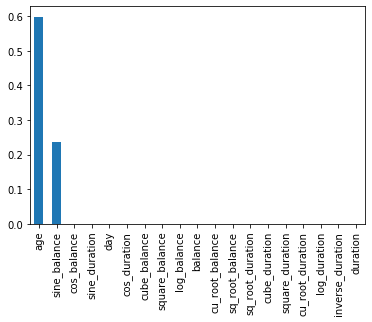

In [132]:
p_values_anova.plot.bar()

In [133]:
# p-values of age and sine_balance are more than 0.05. Can drop these columns as Anova says these columns are having similar mean as the target.

df_bank.drop(['age', 'sine_balance'], inplace = True, axis = 1)


In [134]:
df_bank.head()

,marital,education,balance,housing,contact,day,duration,campaign,y,age_qcuts_5,...,square_balance,cube_duration,cube_balance,sq_root_duration,sq_root_balance,cu_root_duration,cu_root_balance,sine_duration,cos_duration,cos_balance
0,married,tertiary,2143,yes,unknown,5,261.0,1.0,no,"51.0, 71.0",...,4592449,17779581.0,9841618207,16.155494,46.292548,6.390677,12.892606,-0.245281,-0.969452,0.907371
1,single,secondary,29,yes,unknown,5,151.0,1.0,no,"42.0, 51.0",...,841,3442951.0,24389,12.288206,5.385165,5.325074,3.072317,0.202150,0.979355,-0.748058
2,married,secondary,2,yes,unknown,5,76.0,1.0,no,"32.0, 36.0",...,4,438976.0,8,8.717798,1.414214,4.235824,1.259921,0.566108,0.824331,-0.416147
3,married,unknown,1506,yes,unknown,5,92.0,1.0,no,"42.0, 51.0",...,2268036,778688.0,3415662216,9.591663,38.807216,4.514357,11.462385,-0.779466,-0.626444,-0.383587
4,single,unknown,1,no,unknown,5,198.0,1.0,no,"32.0, 36.0",...,1,7762392.0,1,14.071247,1.000000,5.828477,1.000000,-0.079579,-0.996829,0.540302


In [135]:
df_bank.dtypes

marital              object
education            object
balance               int64
housing              object
contact              object
day                   int64
duration            float64
campaign            float64
y                    object
age_qcuts_5          object
Month_Quarters       object
Monthly_Week          int64
balance_qcuts_5      object
duration_qcuts_5     object
inverse_duration    float64
inverse_balance     float64
log_duration        float64
log_balance         float64
square_duration     float64
square_balance        int64
cube_duration       float64
cube_balance          int64
sq_root_duration    float64
sq_root_balance     float64
cu_root_duration    float64
cu_root_balance     float64
sine_duration       float64
cos_duration        float64
cos_balance         float64
dtype: object

In [136]:
df_bank.head()

,marital,education,balance,housing,contact,day,duration,campaign,y,age_qcuts_5,...,square_balance,cube_duration,cube_balance,sq_root_duration,sq_root_balance,cu_root_duration,cu_root_balance,sine_duration,cos_duration,cos_balance
0,married,tertiary,2143,yes,unknown,5,261.0,1.0,no,"51.0, 71.0",...,4592449,17779581.0,9841618207,16.155494,46.292548,6.390677,12.892606,-0.245281,-0.969452,0.907371
1,single,secondary,29,yes,unknown,5,151.0,1.0,no,"42.0, 51.0",...,841,3442951.0,24389,12.288206,5.385165,5.325074,3.072317,0.202150,0.979355,-0.748058
2,married,secondary,2,yes,unknown,5,76.0,1.0,no,"32.0, 36.0",...,4,438976.0,8,8.717798,1.414214,4.235824,1.259921,0.566108,0.824331,-0.416147
3,married,unknown,1506,yes,unknown,5,92.0,1.0,no,"42.0, 51.0",...,2268036,778688.0,3415662216,9.591663,38.807216,4.514357,11.462385,-0.779466,-0.626444,-0.383587
4,single,unknown,1,no,unknown,5,198.0,1.0,no,"32.0, 36.0",...,1,7762392.0,1,14.071247,1.000000,5.828477,1.000000,-0.079579,-0.996829,0.540302


In [137]:
df_bank['education'].value_counts(normalize = True) #Label Encoding after combining unknown with primary

secondary    0.513194
tertiary     0.294198
primary      0.151534
unknown      0.041074
Name: education, dtype: float64

In [138]:
df_bank.loc[df_bank['education'].isin(['unknown']),'education'] = 'primary'
df_bank['education'].value_counts(normalize = True)

secondary    0.513194
tertiary     0.294198
primary      0.192608
Name: education, dtype: float64

In [139]:
#One-hot encoding for Nominal Columns

k = pd.get_dummies(df_bank['marital'],prefix = 'MA')

df_bank.drop(['marital'],axis=1,inplace=True)

df_bank = pd.concat([df_bank,k],axis=1)
df_bank.head()

,education,balance,housing,contact,day,duration,campaign,y,age_qcuts_5,Month_Quarters,...,sq_root_duration,sq_root_balance,cu_root_duration,cu_root_balance,sine_duration,cos_duration,cos_balance,MA_divorced,MA_married,MA_single
0,tertiary,2143,yes,unknown,5,261.0,1.0,no,"51.0, 71.0",Q1,...,16.155494,46.292548,6.390677,12.892606,-0.245281,-0.969452,0.907371,0,1,0
1,secondary,29,yes,unknown,5,151.0,1.0,no,"42.0, 51.0",Q1,...,12.288206,5.385165,5.325074,3.072317,0.202150,0.979355,-0.748058,0,0,1
2,secondary,2,yes,unknown,5,76.0,1.0,no,"32.0, 36.0",Q1,...,8.717798,1.414214,4.235824,1.259921,0.566108,0.824331,-0.416147,0,1,0
3,primary,1506,yes,unknown,5,92.0,1.0,no,"42.0, 51.0",Q1,...,9.591663,38.807216,4.514357,11.462385,-0.779466,-0.626444,-0.383587,0,1,0
4,primary,1,no,unknown,5,198.0,1.0,no,"32.0, 36.0",Q1,...,14.071247,1.000000,5.828477,1.000000,-0.079579,-0.996829,0.540302,0,0,1


In [140]:
#One-hot encoding for Nominal Columns

k = pd.get_dummies(df_bank['housing'],prefix = 'HO')

df_bank.drop(['housing'],axis=1,inplace=True)

df_bank = pd.concat([df_bank,k],axis=1)
df_bank.head()

,education,balance,contact,day,duration,campaign,y,age_qcuts_5,Month_Quarters,Monthly_Week,...,cu_root_duration,cu_root_balance,sine_duration,cos_duration,cos_balance,MA_divorced,MA_married,MA_single,HO_no,HO_yes
0,tertiary,2143,unknown,5,261.0,1.0,no,"51.0, 71.0",Q1,1,...,6.390677,12.892606,-0.245281,-0.969452,0.907371,0,1,0,0,1
1,secondary,29,unknown,5,151.0,1.0,no,"42.0, 51.0",Q1,1,...,5.325074,3.072317,0.202150,0.979355,-0.748058,0,0,1,0,1
2,secondary,2,unknown,5,76.0,1.0,no,"32.0, 36.0",Q1,1,...,4.235824,1.259921,0.566108,0.824331,-0.416147,0,1,0,0,1
3,primary,1506,unknown,5,92.0,1.0,no,"42.0, 51.0",Q1,1,...,4.514357,11.462385,-0.779466,-0.626444,-0.383587,0,1,0,0,1
4,primary,1,unknown,5,198.0,1.0,no,"32.0, 36.0",Q1,1,...,5.828477,1.000000,-0.079579,-0.996829,0.540302,0,0,1,1,0


In [141]:
#One-hot encoding for Nominal Columns

k = pd.get_dummies(df_bank['contact'],prefix = 'CO')

df_bank.drop(['contact'],axis=1,inplace=True)

df_bank = pd.concat([df_bank,k],axis=1)
df_bank.head()

,education,balance,day,duration,campaign,y,age_qcuts_5,Month_Quarters,Monthly_Week,balance_qcuts_5,...,cos_duration,cos_balance,MA_divorced,MA_married,MA_single,HO_no,HO_yes,CO_cellular,CO_telephone,CO_unknown
0,tertiary,2143,5,261.0,1.0,no,"51.0, 71.0",Q1,1,"1859.0, 10500.0",...,-0.969452,0.907371,0,1,0,0,1,0,0,1
1,secondary,29,5,151.0,1.0,no,"42.0, 51.0",Q1,1,"22.0, 272.0",...,0.979355,-0.748058,0,0,1,0,1,0,0,1
2,secondary,2,5,76.0,1.0,no,"32.0, 36.0",Q1,1,"-1701.001, 22.0",...,0.824331,-0.416147,0,1,0,0,1,0,0,1
3,primary,1506,5,92.0,1.0,no,"42.0, 51.0",Q1,1,"701.0, 1859.0",...,-0.626444,-0.383587,0,1,0,0,1,0,0,1
4,primary,1,5,198.0,1.0,no,"32.0, 36.0",Q1,1,"-1701.001, 22.0",...,-0.996829,0.540302,0,0,1,1,0,0,0,1


In [142]:
df_bank['education'] = label_encoder.fit_transform(df_bank['education'])
df_bank['age_qcuts_5'] = label_encoder.fit_transform(df_bank['age_qcuts_5'])
df_bank['Month_Quarters'] = label_encoder.fit_transform(df_bank['Month_Quarters'])
df_bank['balance_qcuts_5'] = label_encoder.fit_transform(df_bank['balance_qcuts_5'])
df_bank['duration_qcuts_5'] = label_encoder.fit_transform(df_bank['duration_qcuts_5'])
df_bank.head()

,education,balance,day,duration,campaign,y,age_qcuts_5,Month_Quarters,Monthly_Week,balance_qcuts_5,...,cos_duration,cos_balance,MA_divorced,MA_married,MA_single,HO_no,HO_yes,CO_cellular,CO_telephone,CO_unknown
0,2,2143,5,261.0,1.0,no,4,0,1,1,...,-0.969452,0.907371,0,1,0,0,1,0,0,1
1,1,29,5,151.0,1.0,no,3,0,1,2,...,0.979355,-0.748058,0,0,1,0,1,0,0,1
2,1,2,5,76.0,1.0,no,1,0,1,0,...,0.824331,-0.416147,0,1,0,0,1,0,0,1
3,0,1506,5,92.0,1.0,no,3,0,1,4,...,-0.626444,-0.383587,0,1,0,0,1,0,0,1
4,0,1,5,198.0,1.0,no,1,0,1,0,...,-0.996829,0.540302,0,0,1,1,0,0,0,1


In [143]:
k = pd.get_dummies(df_bank['campaign'],prefix = 'CA')

df_bank.drop(['campaign'],axis=1,inplace=True)

df_bank = pd.concat([df_bank,k],axis=1)
df_bank.head()

,education,balance,day,duration,y,age_qcuts_5,Month_Quarters,Monthly_Week,balance_qcuts_5,duration_qcuts_5,...,HO_yes,CO_cellular,CO_telephone,CO_unknown,CA_1.0,CA_2.0,CA_3.0,CA_4.0,CA_5.0,CA_6.0
0,2,2143,5,261.0,no,4,0,1,1,2,...,1,0,0,1,1,0,0,0,0,0
1,1,29,5,151.0,no,3,0,1,2,1,...,1,0,0,1,1,0,0,0,0,0
2,1,2,5,76.0,no,1,0,1,0,0,...,1,0,0,1,1,0,0,0,0,0
3,0,1506,5,92.0,no,3,0,1,4,4,...,1,0,0,1,1,0,0,0,0,0
4,0,1,5,198.0,no,1,0,1,0,1,...,0,0,0,1,1,0,0,0,0,0


In [144]:
df_bank.loc[df_bank['y'] == 'no', 'y'] = 0
df_bank.loc[df_bank['y'] == 'yes', 'y'] = 1
df_bank.dtypes

education             int32
balance               int64
day                   int64
duration            float64
y                    object
age_qcuts_5           int32
Month_Quarters        int32
Monthly_Week          int64
balance_qcuts_5       int32
duration_qcuts_5      int32
inverse_duration    float64
inverse_balance     float64
log_duration        float64
log_balance         float64
square_duration     float64
square_balance        int64
cube_duration       float64
cube_balance          int64
sq_root_duration    float64
sq_root_balance     float64
cu_root_duration    float64
cu_root_balance     float64
sine_duration       float64
cos_duration        float64
cos_balance         float64
MA_divorced           uint8
MA_married            uint8
MA_single             uint8
HO_no                 uint8
HO_yes                uint8
CO_cellular           uint8
CO_telephone          uint8
CO_unknown            uint8
CA_1.0                uint8
CA_2.0                uint8
CA_3.0              

In [147]:
# Columns to drop from the CHI-Square Test result

df_bank.drop('MA_divorced', inplace = True, axis = 1)
df_bank.drop('CA_3.0', inplace = True, axis = 1)
df_bank.drop('CA_2.0', inplace = True, axis = 1)

In [148]:
df_bank['y'] = df_bank['y'].astype('uint8')
df_bank.dtypes

education             int32
balance               int64
day                   int64
duration            float64
y                     uint8
age_qcuts_5           int32
Month_Quarters        int32
Monthly_Week          int64
balance_qcuts_5       int32
duration_qcuts_5      int32
inverse_duration    float64
inverse_balance     float64
log_duration        float64
log_balance         float64
square_duration     float64
square_balance        int64
cube_duration       float64
cube_balance          int64
sq_root_duration    float64
sq_root_balance     float64
cu_root_duration    float64
cu_root_balance     float64
sine_duration       float64
cos_duration        float64
cos_balance         float64
MA_married            uint8
MA_single             uint8
HO_no                 uint8
HO_yes                uint8
CO_cellular           uint8
CO_telephone          uint8
CO_unknown            uint8
CA_1.0                uint8
CA_4.0                uint8
CA_5.0                uint8
CA_6.0              

In [149]:
df_bank_target = df_bank['y']

In [150]:
df_bank_target.head()

df_bank.drop('y', inplace = True, axis = 1)

In [151]:
df_bank

,education,balance,day,duration,age_qcuts_5,Month_Quarters,Monthly_Week,balance_qcuts_5,duration_qcuts_5,inverse_duration,...,MA_single,HO_no,HO_yes,CO_cellular,CO_telephone,CO_unknown,CA_1.0,CA_4.0,CA_5.0,CA_6.0
0,2,2143,5,261.0,4,0,1,1,2,0.003831,...,0,0,1,0,0,1,1,0,0,0
1,1,29,5,151.0,3,0,1,2,1,0.006623,...,1,0,1,0,0,1,1,0,0,0
2,1,2,5,76.0,1,0,1,0,0,0.013158,...,0,0,1,0,0,1,1,0,0,0
3,0,1506,5,92.0,3,0,1,4,4,0.010870,...,0,0,1,0,0,1,1,0,0,0
4,0,1,5,198.0,1,0,1,0,1,0.005051,...,1,1,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,2,825,17,977.0,3,2,3,4,3,0.001024,...,0,1,0,1,0,0,0,0,0,0
45207,0,1729,17,456.0,4,2,3,4,3,0.002193,...,0,1,0,1,0,0,0,0,0,0
45208,1,5715,17,1031.0,4,2,3,1,3,0.000970,...,0,1,0,1,0,0,0,0,1,0
45209,1,668,17,508.0,4,2,3,3,3,0.001969,...,0,1,0,0,1,0,0,1,0,0


In [152]:
df_bank.drop('inverse_balance', inplace = True, axis = 1) #Dropping this column as it might impact the final output as it is highly skewed and has a high Kurtosis

### Modelling

Stratified shuffle split used as its an imbalanced dataset

Logistic Regression and Random Forest are the two algorithms used for this dataset.

In [153]:
from sklearn.model_selection import StratifiedShuffleSplit

split_size = 0.2

splits_ins = StratifiedShuffleSplit(n_splits = 2, test_size = split_size, random_state=42)

splits = splits_ins.split(df_bank, df_bank_target)


In [154]:
for train_index, val_index in splits:
    features_train = df_bank.iloc[list(train_index),:]
    target_train = df_bank_target.take(list(train_index),axis=0)
    features_val = df_bank.iloc[list(val_index),:]
    target_val = df_bank_target.take(list(val_index),axis=0)
    
features_train.reset_index(drop=True, inplace=True)
target_train.reset_index(drop=True, inplace=True)
features_val.reset_index(drop=True, inplace=True)
target_val.reset_index(drop=True, inplace=True)


In [155]:
target_val.value_counts()

0    7985
1    1058
Name: y, dtype: int64

In [156]:
target_train.shape

(36168,)

In [304]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(fit_intercept=True, class_weight = 'balanced', C = 100)

In [305]:
model.fit(X=features_train, y=target_train)

LogisticRegression(C=10000, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [306]:
r = model.predict_proba(X=features_train)
np.shape(r)

(36168, 2)

In [307]:
r_df = pd.DataFrame(r)

In [308]:
# Resulting dataframe is the probabilities of 1's and 0's

r_df

,0,1
0,0.499918,0.500082
1,0.497228,0.502772
2,0.493790,0.506210
3,0.487391,0.512609
4,0.441039,0.558961
...,...,...
36163,0.451948,0.548052
36164,0.486141,0.513859
36165,0.499989,0.500011
36166,0.339843,0.660157


In [309]:
r_df.loc['Predicted_Classes_0.6'] = 0
r_df.loc[r_df[1]>=0.6, 'Predicted_Classes_0.6'] = 1
r_df.tail()

,0,1,Predicted_Classes_0.6
36164,0.486141,0.513859,NaN
36165,0.499989,0.500011,NaN
36166,0.339843,0.660157,1.0
36167,0.402179,0.597821,NaN
Predicted_Classes_0.6,0.000000,0.000000,NaN


In [310]:
r_df['Predicted_Classes_0.6'] = r_df['Predicted_Classes_0.6'].fillna(0)

In [311]:
r_df.drop(0,inplace = True, axis = 1)
r_df.drop(1,inplace = True, axis = 1)

In [312]:
r_df.tail()

,Predicted_Classes_0.6
36164,0.0
36165,0.0
36166,1.0
36167,0.0
Predicted_Classes_0.6,0.0


In [313]:
r_df = r_df.iloc[:-1 , :]
r_df['Predicted_Classes_0.6'].tail()

36163    0.0
36164    0.0
36165    0.0
36166    1.0
36167    0.0
Name: Predicted_Classes_0.6, dtype: float64

In [314]:
# Printing the Confusion Matrix for the training set

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true = target_train, y_pred = r_df))

[[29498  2439]
 [ 2418  1813]]


In [315]:
#Training precision

precision = 1813 / (1813 + 2418)
precision

0.4285038997872843

In [316]:
features_val.shape

(9043, 34)

In [317]:
t = model.predict_proba(X=features_val)
t_df = pd.DataFrame(t)
t_df.shape

(9043, 2)

In [318]:
t_df.loc['Predicted_Classes_0.6'] = 0

In [319]:
t_df.loc[t_df[1]>=0.6, 'Predicted_Classes_0.6'] = 1

In [320]:
t_df['Predicted_Classes_0.6'] = t_df['Predicted_Classes_0.6'].fillna(0)

In [321]:
t_df.drop(0,inplace = True, axis = 1)
t_df.drop(1,inplace = True, axis = 1)

In [322]:
t_df = t_df.iloc[:-1 , :]
t_df['Predicted_Classes_0.6'].tail()

9038    0.0
9039    0.0
9040    0.0
9041    0.0
9042    0.0
Name: Predicted_Classes_0.6, dtype: float64

In [323]:
t_df.shape

(9043, 1)

In [324]:
# Printing the confusion matrix for the testing set

print(confusion_matrix(y_true = target_val, y_pred = t_df))

[[7398  587]
 [ 612  446]]


In [270]:
#Testing precision and Recall

precision = 446 / (446 + 612)
precision

0.4215500945179584

In [271]:
recall = 446 / (446 + 587)
recall

0.4317521781219748

In [180]:
from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV

# rf = RandomForestClassifier(random_state = 42)

# param_grid = {
#     'bootstrap': [True],
#     'max_depth': [10, 30],
#     'max_features': [11, 20],
#     'min_samples_leaf': [11, 20],
#     'min_samples_split': [5, 15],
#     'n_estimators': [1, 100]
# }

# param_grid = {
#      'bootstrap': [True],
#      'max_features': [5, 15, 20],
#      'min_samples_leaf': [11, 15, 30],
#      'min_samples_split': [5, 15, 30],
#  }

# grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
#                           cv = 10, n_jobs = -1, verbose = 2, error_score="raise")

# grid_search.fit(features_train,target_train)

# Model_SVM.fit(features_train, target_train.values.ravel())
    
# train_predictions = Model_SVM.predict(features_train)
# val_predictions = Model_SVM.predict(features_val)
    
# train_predictions = pd.DataFrame(train_predictions)
# val_predictions = pd.DataFrame(val_predictions)
    
# train_predictions.reset_index(drop=True, inplace=True)
# val_predictions.reset_index(drop=True, inplace=True)

In [181]:
base_model_RFC = RandomForestClassifier(bootstrap=True, criterion = 'entropy', ccp_alpha=0.0,
                      max_depth=100, max_features=30, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=1500, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [182]:
base_model_RFC.fit(features_train,target_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=100, max_features=30,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=1500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [183]:
train_predictions = base_model_RFC.predict_proba(features_train)

val_predictions = base_model_RFC.predict_proba(features_val)

In [184]:
train_predictions = pd.DataFrame(train_predictions)
train_predictions.loc['Predicted_Classes_0.6'] = 0
train_predictions.head()
train_predictions.loc[train_predictions[1]>=0.6, 'Predicted_Classes_0.6'] = 1
train_predictions.tail()

,0,1,Predicted_Classes_0.6
36164,0.384604,0.615396,1.0
36165,0.999102,0.000898,NaN
36166,0.748236,0.251764,NaN
36167,0.781849,0.218151,NaN
Predicted_Classes_0.6,0.000000,0.000000,NaN


In [185]:
train_predictions.tail()

,0,1,Predicted_Classes_0.6
36164,0.384604,0.615396,1.0
36165,0.999102,0.000898,NaN
36166,0.748236,0.251764,NaN
36167,0.781849,0.218151,NaN
Predicted_Classes_0.6,0.000000,0.000000,NaN


In [186]:
train_predictions['Predicted_Classes_0.6'] = train_predictions['Predicted_Classes_0.6'].fillna(0)
train_predictions.head()

,0,1,Predicted_Classes_0.6
0,0.998488,0.001512,0.0
1,0.999797,0.000203,0.0
2,0.999610,0.000390,0.0
3,0.884191,0.115809,0.0
4,0.466226,0.533774,0.0


In [187]:
train_predictions.drop(0,inplace = True, axis = 1)

In [188]:
train_predictions.drop(1,inplace = True, axis = 1)

In [189]:
target_train.tail()

36163    0
36164    1
36165    0
36166    0
36167    0
Name: y, dtype: uint8

In [190]:
train_predictions['Predicted_Classes_0.6'].tail()
train_predictions = train_predictions.iloc[:-1 , :]
train_predictions['Predicted_Classes_0.6'].tail()

36163    0.0
36164    1.0
36165    0.0
36166    0.0
36167    0.0
Name: Predicted_Classes_0.6, dtype: float64

In [191]:
features_train.shape, target_train.shape, features_val.shape, target_val.shape

((36168, 34), (36168,), (9043, 34), (9043,))

In [192]:
#Metrics on Training

print(confusion_matrix(y_true = target_train, y_pred = train_predictions))

[[31903    34]
 [ 2787  1444]]


In [193]:
train_predictions['Predicted_Classes_0.6'].value_counts()

0.0    34690
1.0     1478
Name: Predicted_Classes_0.6, dtype: int64

In [194]:
precision = 1464/(1464 + 2767)
precision

0.34601748995509335

In [195]:
#Metrics on Testing

val_predictions = pd.DataFrame(val_predictions)
val_predictions.loc['Predicted_Classes_0.6'] = 0
val_predictions.head()
val_predictions.loc[val_predictions[1]>=0.6, 'Predicted_Classes_0.6'] = 1
val_predictions.head()


,0,1,Predicted_Classes_0.6
0,0.970768,0.029232,NaN
1,0.995475,0.004525,NaN
2,0.999710,0.000290,NaN
3,0.543615,0.456385,NaN
4,0.890506,0.109494,NaN


In [196]:
val_predictions['Predicted_Classes_0.6'] = val_predictions['Predicted_Classes_0.6'].fillna(0)
val_predictions.head()

,0,1,Predicted_Classes_0.6
0,0.970768,0.029232,0.0
1,0.995475,0.004525,0.0
2,0.999710,0.000290,0.0
3,0.543615,0.456385,0.0
4,0.890506,0.109494,0.0


In [197]:
val_predictions['Predicted_Classes_0.6'].value_counts()

0.0    8772
1.0     272
Name: Predicted_Classes_0.6, dtype: int64

In [198]:
val_predictions.drop(0,inplace = True, axis = 1)
val_predictions.drop(1,inplace = True, axis = 1)

In [199]:
val_predictions.tail()
val_predictions = val_predictions.iloc[:-1 , :]

In [200]:
val_predictions.head()

,Predicted_Classes_0.6
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [201]:
print(confusion_matrix(y_true = target_val, y_pred = val_predictions))

[[7890   95]
 [ 881  177]]


In [204]:
# Testing Metrics

precision = 177 / (177 + 881)
precision

0.16729678638941398

In [205]:
recall = 177 / (177+95) 
recall

0.6507352941176471

## References

1. https://towardsdatascience.com/chi-square-test-for-feature-selection-in-machine-learning-206b1f0b8223#:~:text=A%20chi%2Dsquare%20test%20is,count%20O%20deviates%20each%20other.

2. https://towardsdatascience.com/anova-for-feature-selection-in-machine-learning-d9305e228476

3. https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/